In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

In [3]:
df = pd.read_csv('/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv')

In [4]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
summary_status = df.describe()
print(summary_status)

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [9]:
print(df.mode())

     Transaction ID        Date Customer ID  Gender   Age Product Category  \
0                 1  2023-05-16     CUST001  Female  43.0         Clothing   
1                 2         NaN     CUST002     NaN  64.0              NaN   
2                 3         NaN     CUST003     NaN   NaN              NaN   
3                 4         NaN     CUST004     NaN   NaN              NaN   
4                 5         NaN     CUST005     NaN   NaN              NaN   
..              ...         ...         ...     ...   ...              ...   
995             996         NaN     CUST995     NaN   NaN              NaN   
996             997         NaN     CUST996     NaN   NaN              NaN   
997             998         NaN     CUST997     NaN   NaN              NaN   
998             999         NaN     CUST998     NaN   NaN              NaN   
999            1000         NaN     CUST999     NaN   NaN              NaN   

     Quantity  Price per Unit  Total Amount  
0         4.0    

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

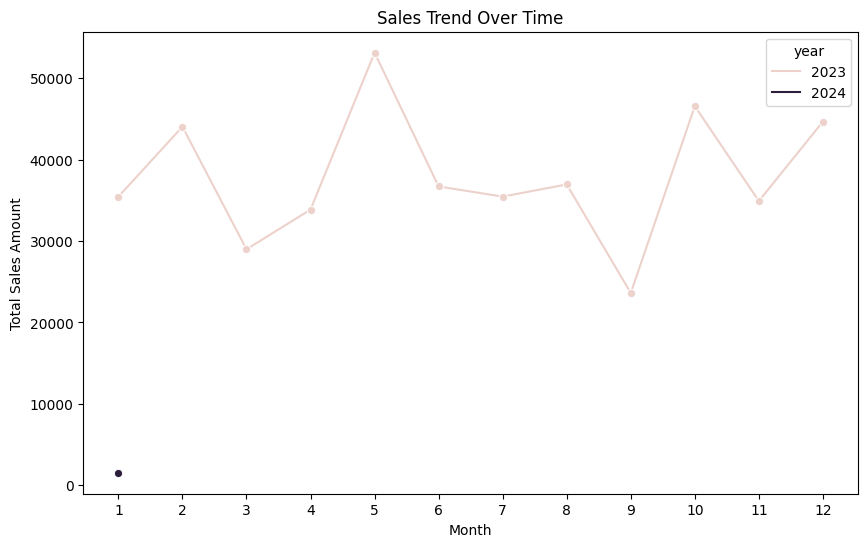

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df[('Year')] = df['Date'].dt.year
df[('Month')] = df[('Date')].dt.month
sales_over_time = df.groupby(['Year','Month'])['Total Amount'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_over_time,x='Month',y='Total Amount',hue='Year',marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(np.arange(1,13))
plt.legend(title='year')
plt.show()

In [11]:
customer_demographics = df.groupby('Gender').agg({'Customer ID':'nunique','Age':['min','max','mean']})
print(customer_demographics)
product_analysis = df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'}).sort_values(by='Total Amount', ascending=False)
print(product_analysis)

       Customer ID Age               
           nunique min max       mean
Gender                               
Female         510  18  64  41.356863
Male           490  18  64  41.428571
                  Quantity  Total Amount
Product Category                        
Electronics            849        156905
Clothing               894        155580
Beauty                 771        143515


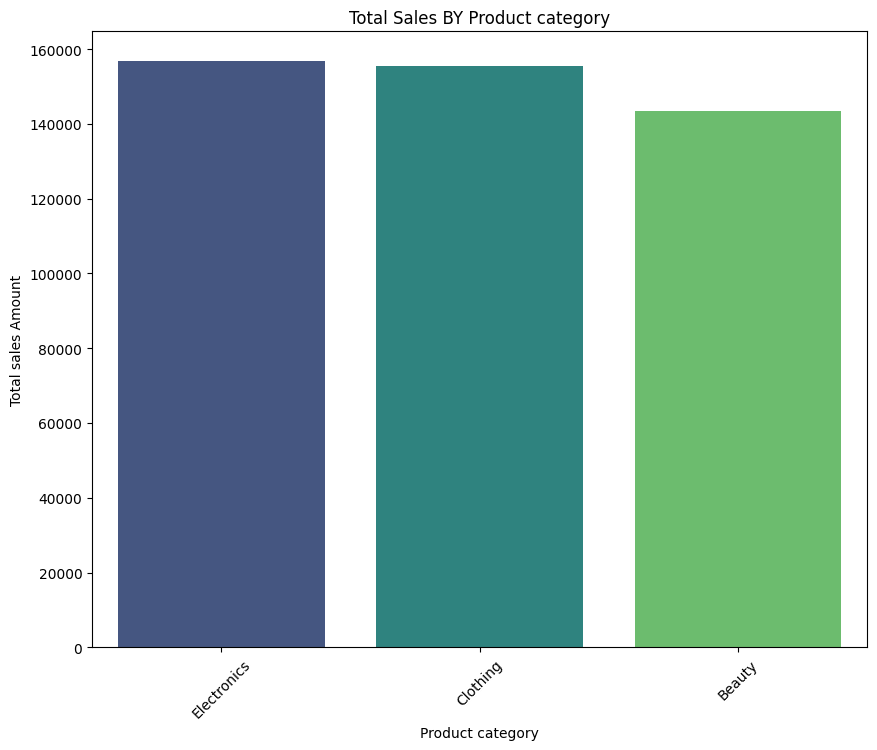

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(data=product_analysis, x=product_analysis.index, y='Total Amount',palette='viridis')
plt.title('Total Sales BY Product category')
plt.xlabel('Product category')
plt.ylabel('Total sales Amount')
plt.xticks(rotation=45)
plt.show()

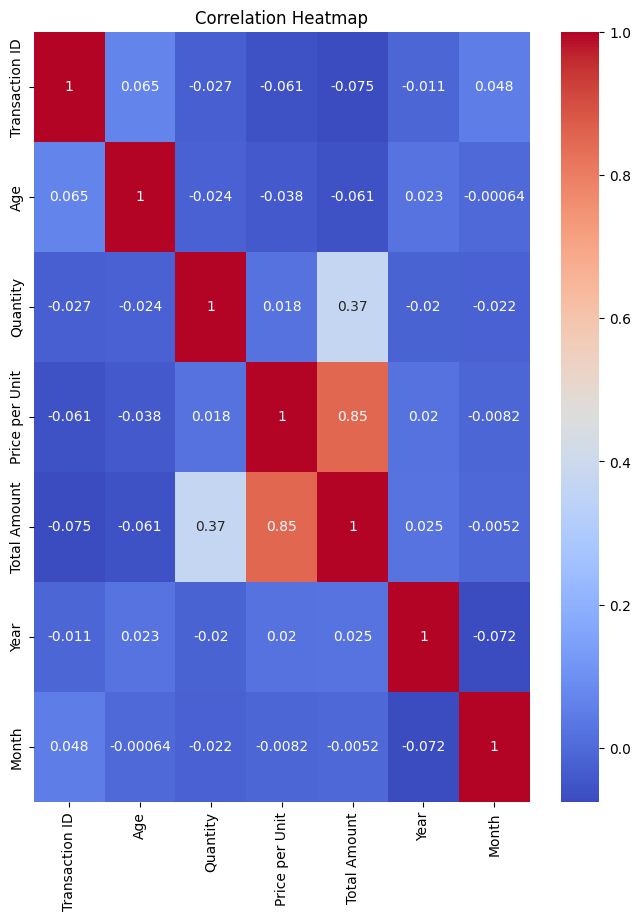

In [13]:

numeric_columns = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
